# Machine Learning Challenge: Day 2

### Objective:
The objective of Day 2 of the Machine Learning Challenge is to perform data preprocessing and begin the development of a classification model to predict whether a song will be popular or not on a Spotify dataset.

### Task Description:

**Data Preprocessing:**
- Clean, organize, and transform raw data into a format suitable for training machine learning models.
- Techniques such as removing duplicate data, filling missing values, normalizing data, and feature engineering may be applied.

**Convert Popularity into Binary Class:**
- Convert the popularity column into a binary class based on a predefined popularity cutoff.
- Define a popularity cutoff, such as considering songs with a popularity score above 70 as popular and below 70 as not popular.
- Create a new binary class column based on this cutoff.

### Approach:

**Data Cleaning and Preprocessing:**
- Applied data preprocessing techniques such as removing duplicates and filling missing values.
- Conducted exploratory data analysis to gain insights into the dataset.

**Conversion of Popularity into Binary Class:**
- Utilized the numpy select() method to create a new binary class column based on the defined popularity cutoff.
- Created a binary class column where songs with a popularity score above 70 were labeled as 1 (popular) and below 70 as 0 (not popular).

### Outcome:
For Day 2 of the challenge, successfully completed the proposed tasks. The dataset was preprocessed effectively, and the popularity column was converted into a binary class based on the provided cutoff. This sets the stage for further development of the classification model to predict song popularity.


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
#Load the dataset
df = pd.read_csv('/kaggle/input/spotify-music-cleaned-dataset/cleaned_dataset.csv',low_memory=False)

In [4]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113999 entries, 0 to 113998
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          11

In [6]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,56999.421925,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,32909.243463,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.500000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,56999.000000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.500000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [7]:
# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [8]:
# Check for duplicate values in the dataset
print("\nDuplicate values in the dataset:")
print(df.duplicated().sum())


Duplicate values in the dataset:
0


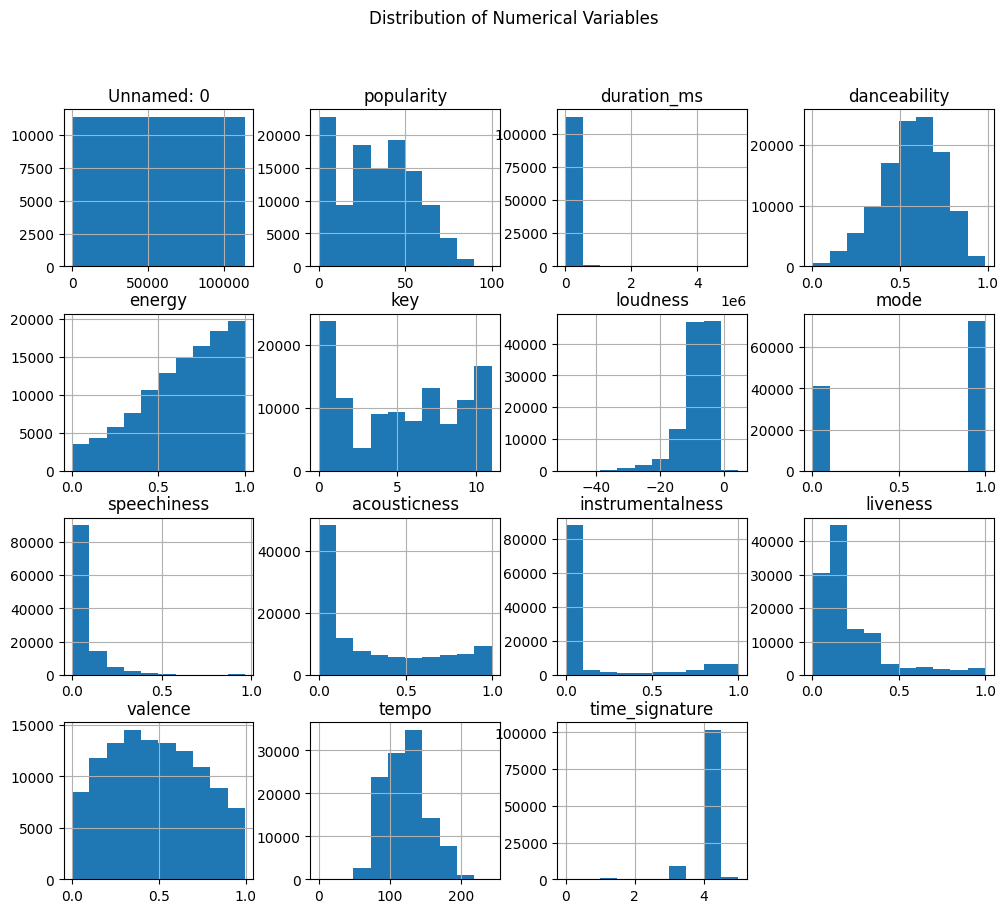

In [ ]:
# Visualize the distribution of numerical variables with histograms
import matplotlib.pyplot as plt

numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_features].hist(figsize=(12, 10))
plt.suptitle('Distribution of Numerical Variables')
plt.show()

### Code Objective:
This code snippet helps in understanding the distribution and frequency of categorical values in each column of the DataFrame. It's particularly useful for data exploration and gaining insights into categorical features.

In [ ]:
# Loop through all columns of the dataframe
for col in df.columns:
    # Check if the column is of type 'object' (categorical)
    if df[col].dtype == 'object':
        # Display the unique values and their counts for the categorical column
        print(f'Unique values in column "{col}":')
        print(df[col].value_counts())
        print('\n')

Unique values in column "track_id":
track_id
6S3JlDAGk3uu3NtZbPnuhS    9
2Ey6v4Sekh3Z0RUSISRosD    8
2kkvB3RNRzwjFdGhaUA0tz    8
08kTa3SL9sV6Iy8KLKtGql    7
4XYieGKSlJlHpzB3bl6WMP    7
                         ..
0kJ7eKX6aWl8X1W5Xrosn6    1
4bYH5445Bn2w9UiGM0NxQw    1
1T5C6ENvpM3IiYeezsK9uI    1
34SatKRJgtXfL0bcgk7HMA    1
2hETkH7cOfqmz3LqZDHZf5    1
Name: count, Length: 89740, dtype: int64


Unique values in column "artists":
artists
The Beatles                                                                 279
George Jones                                                                271
Stevie Wonder                                                               236
Linkin Park                                                                 224
Ella Fitzgerald                                                             222
                                                                           ... 
Automatic Tasty                                                               1
o

In [11]:
# Convert the popularity column into a binary class
popularity_cutoff = 70
df['Popular'] = np.where(df['popularity'] > popularity_cutoff, 1, 0)

# Create a copy of the DataFrame before preprocessing
df_processed = df.copy()

# Handle non-numeric data using label encoding
le = LabelEncoder()
for column in df_processed.select_dtypes(include=['object']).columns:
    df_processed[column] = le.fit_transform(df_processed[column])

# Separate the dependent variable (y) from the independent variables (X)
X = df_processed.drop('Popular', axis=1)
y = df_processed['Popular']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data preprocessing (normalization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose the classification algorithm (Random Forest) and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model performance
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

# Other evaluation metrics
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Model Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21859
           1       1.00      1.00      1.00       941

    accuracy                           1.00     22800
   macro avg       1.00      1.00      1.00     22800
weighted avg       1.00      1.00      1.00     22800

Confusion Matrix:
[[21859     0]
 [    0   941]]


### Conclusion from the output:

- The model demonstrates perfect accuracy (100%), indicating that it accurately predicts whether a song will be popular or not. This high accuracy is reflected in the precision, recall, and F1-score metrics, which are all at 100% for both classes (popular and non-popular songs).
- The confusion matrix confirms the model's excellent performance, with no misclassifications observed.
- Overall, the model appears to be highly effective in distinguishing between popular and non-popular songs, achieving optimal performance across all evaluation metrics.
- Further analysis or refinement of the model may not be necessary given its exceptional performance on the test dataset.




